In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
PATH_INPUT_DATA = '[i] data/'
PATH_OUTPUT_TABLE = '[o] table/'

In [3]:
if not(os.path.isdir(PATH_OUTPUT_TABLE)):
    os.makedirs(PATH_OUTPUT_TABLE)

In [4]:
# train
filename = 'train.csv'
path = PATH_INPUT_DATA + filename
df_train = pd.read_csv(path)

# test
filename = 'test.csv'
path = PATH_INPUT_DATA + filename
df_test = pd.read_csv(path)

# 제출용
filename = 'sample_submission.csv'
path = PATH_INPUT_DATA + filename
df_submission = pd.read_csv(path)

In [5]:
df_train.describe()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,7.982000e+03,7.987000e+03,7.992000e+03,7.931000e+03,8.081000e+03,8.013000e+03,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,17.568000,0.180212,0.203529,0.229804,0.259158,0.289975,0.322244,0.354101,0.384492,...,7.511190e-11,4.270426e-11,2.498465e-11,4.047717e-11,1.153774e-10,2.364072e-10,7.990686,4.009146,9.019226,3.042651
std,2886.89568,5.595847,0.272859,0.288661,0.306340,0.324849,0.342362,0.357700,0.370451,0.379054,...,3.831916e-10,2.293432e-10,1.639150e-10,2.134495e-10,5.179299e-10,1.058272e-09,2.970818,0.997828,2.979453,1.881872
min,0.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.080000,0.000000,0.000000
25%,2499.75000,15.000000,0.007318,0.009520,0.011270,0.013728,0.016350,0.019510,0.026217,0.037235,...,1.574964e-19,0.000000e+00,0.000000e+00,0.000000e+00,5.669218e-18,6.574627e-17,5.990000,3.330000,7.000000,1.640000
50%,4999.50000,20.000000,0.052025,0.064600,0.078565,0.095355,0.119635,0.148590,0.181905,0.219260,...,6.566552e-16,8.391564e-17,2.525680e-17,1.231848e-16,3.395726e-15,1.717923e-14,8.010000,4.010000,8.990000,2.980000
75%,7499.25000,25.000000,0.221117,0.276952,0.339075,0.417478,0.510915,0.607150,0.698085,0.781490,...,9.503366e-13,3.186890e-13,1.234955e-13,2.958971e-13,2.392410e-12,6.942183e-12,10.010000,4.700000,11.020000,4.330000
max,9999.00000,25.000000,1.019990,1.019970,1.019930,1.019880,1.020000,1.019970,1.019970,1.019940,...,1.343132e-08,6.461523e-09,5.773867e-09,5.529940e-09,1.013262e-08,2.682289e-08,21.590000,7.690000,20.070000,10.310000


In [6]:
df_test.describe()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,8.024000e+03,8.081000e+03,8.019000e+03,8.000000e+03,8.001000e+03,8.051000e+03,7.980000e+03,8.024000e+03,7.989000e+03,8.030000e+03
mean,14999.50000,17.495500,0.180019,0.203678,0.230319,0.259816,0.291496,0.323884,0.356673,0.387589,...,7.715626e-11,6.983341e-11,6.524223e-11,8.246489e-11,7.597039e-11,4.429934e-11,2.662845e-11,4.542480e-11,1.197293e-10,2.499737e-10
std,2886.89568,5.615882,0.270866,0.286827,0.304553,0.323496,0.341311,0.357078,0.369559,0.378026,...,3.510083e-10,3.129258e-10,2.928428e-10,3.612487e-10,3.760606e-10,2.404518e-10,1.729574e-10,2.831147e-10,5.361285e-10,1.047715e-09
min,10000.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,12499.75000,10.000000,0.007567,0.009725,0.012220,0.013338,0.016260,0.018985,0.026253,0.036335,...,3.239118e-19,1.198502e-19,1.091996e-19,4.782415e-19,1.697161e-19,0.000000e+00,0.000000e+00,0.000000e+00,6.932872e-18,5.740387e-17
50%,14999.50000,15.000000,0.053375,0.066420,0.082290,0.099510,0.123550,0.151360,0.188430,0.229180,...,1.342652e-15,7.029654e-16,5.635045e-16,1.552119e-15,8.890709e-16,1.289191e-16,2.217595e-17,1.576788e-16,4.863574e-15,2.135066e-14
75%,17499.25000,25.000000,0.225513,0.278710,0.342330,0.422447,0.512260,0.606375,0.698940,0.783555,...,1.655310e-12,1.355777e-12,1.098150e-12,1.542382e-12,1.332899e-12,4.245411e-13,1.387875e-13,3.854661e-13,2.749760e-12,7.590586e-12
max,19999.00000,25.000000,1.019930,1.019950,1.019840,1.019890,1.019900,1.019920,1.020000,1.019890,...,9.353462e-09,8.654387e-09,7.744030e-09,9.627488e-09,1.481643e-08,6.492176e-09,5.715315e-09,9.173911e-09,1.390299e-08,2.156264e-08


In [7]:
df_train.keys()

Index(['id', 'rho', '650_src', '660_src', '670_src', '680_src', '690_src',
       '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
       '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
       '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
       '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
       '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',
       '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst', 'hhb', 'hbo2',
       'ca', 'na'],
      dtype='object')

In [8]:
#col_input = ['rho_10', 'rho_15', 'rho_20', 'rho_25', 
col_input = ['650_src', '660_src', '670_src', '680_src', '690_src',
             '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
             '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
             '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
             '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
             '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',
             '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
             '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
             '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
             '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
             '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
             '950_dst', '960_dst', '970_dst', '980_dst', '990_dst']
col_output = ['hhb', 'hbo2', 'ca', 'na']

col_input_src = ['650_src', '660_src', '670_src', '680_src', '690_src',
             '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
             '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
             '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
             '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
             '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',]
col_input_dst = ['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
             '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
             '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
             '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
             '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
             '950_dst', '960_dst', '970_dst', '980_dst', '990_dst']

In [9]:
df_train['rho'].value_counts()

25    2557
15    2509
20    2478
10    2456
Name: rho, dtype: int64

# 결측치 처리
df_train_dropped = df_train.dropna(axis=0)

In [10]:
df_train

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,15,0.23929,0.30265,0.39929,0.51000,0.64072,0.77328,0.86722,0.95891,...,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14,12.68,4.11,12.31,0.10
9996,9996,20,0.02583,0.00946,0.03650,0.01380,0.04093,0.04363,0.03260,0.05282,...,1.814274e-16,1.117148e-16,7.352416e-17,NaN,5.825347e-16,4.226436e-15,8.46,4.11,10.46,3.12
9997,9997,10,0.57589,0.62976,0.70571,0.77248,0.85402,0.92796,0.97691,0.98933,...,4.828451e-11,3.110419e-11,8.119095e-12,NaN,1.504115e-10,4.003657e-10,9.84,3.20,10.45,2.06
9998,9998,15,1.01477,1.01504,0.99125,0.98747,1.00717,1.01434,0.99529,1.01322,...,3.279271e-13,0.000000e+00,4.475946e-14,NaN,2.818857e-12,1.408742e-11,6.38,4.06,11.28,4.03


In [11]:
df_train[['rho_10', 'rho_15', 'rho_20', 'rho_25']] = pd.get_dummies(df_train['rho'])
df_test[['rho_10', 'rho_15', 'rho_20', 'rho_25']] = pd.get_dummies(df_test['rho'])

## 데이터 특성 확인

In [15]:
# rho별로 데이터를 나눔
# 결측치 보정
rhos = [10, 15, 20, 25]

# train, validation dataset
data = copy.deepcopy(df_train)
#data.fillna(method='bfill')
data = data.fillna(method='pad')
data = data.fillna(method='bfill')
idx = data['rho'] == 10
df_train_10 = data[idx]

idx = data['rho'] == 15
df_train_15 = data[idx]

idx = data['rho'] == 20
df_train_20 = data[idx]

idx = data['rho'] == 25
df_train_25 = data[idx]

df_trains = [df_train_10, df_train_15, df_train_20, df_train_25]


# submission datset
data = copy.deepcopy(df_test)
#data.fillna(method='bfill')
data = data.fillna(method='pad')
data = data.fillna(method='bfill')
idx = data['rho'] == 10
df_submission_10 = data[idx]

idx = data['rho'] == 15
df_submission_15 = data[idx]

idx = data['rho'] == 20
df_submission_20 = data[idx]

idx = data['rho'] == 25
df_submission_25 = data[idx]

X_submissions = [df_submission_10, df_submission_15, df_submission_20, df_submission_25]

In [16]:
X_trains = list()
X_vals = list()
X_tests = list()

Y_trains = list()
Y_vals = list()
Y_tests = list()

for df_tr in df_trains:
    X = df_tr[col_input]
    Y = df_tr[col_output]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)
    
    X_trains.append(X_train)
    X_vals.append(X_val)
    X_tests.append(X_test)

    Y_trains.append(Y_train)
    Y_vals.append(Y_val)
    Y_tests.append(Y_test)

In [17]:
# 전처리:스케일 맞춤
scalers = list()
idx = col_input[4:]

for i, X_train in enumerate(X_trains):
    X_val = X_vals[i]
    X_test = X_tests[i]
    X_submission = X_submissions[i]
    
    #scaler = StandardScaler()
    scaler = MinMaxScaler()
    scaler.fit(X_train[idx])
    
    X_train[idx] = scaler.transform(X_train[idx])
    X_val[idx] = scaler.transform(X_val[idx])
    X_test[idx] = scaler.transform(X_test[idx])
    X_submission[idx] = scaler.transform(X_submission[idx])

/Users/juyeonghwan/opt/anaconda3/envs/LittleForest/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/juyeonghwan/opt/anaconda3/envs/LittleForest/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/juyeonghwan/opt/anaconda3/envs/LittleForest/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

# orginal

### Orginal End
### 합침

Train on 1571 samples, validate on 393 samples
Epoch 1/50
1571/1571 [==============================] - 2s 960us/step - loss: 17.3898 - accuracy: 0.5792 - val_loss: 7.7853 - val_accuracy: 0.5318
Epoch 2/50
1571/1571 [==============================] - 0s 104us/step - loss: 6.5928 - accuracy: 0.5792 - val_loss: 5.8831 - val_accuracy: 0.5318
Epoch 3/50
1571/1571 [==============================] - 0s 98us/step - loss: 5.5314 - accuracy: 0.5792 - val_loss: 5.2792 - val_accuracy: 0.5318
Epoch 4/50
1571/1571 [==============================] - 0s 150us/step - loss: 5.2631 - accuracy: 0.5792 - val_loss: 5.0153 - val_accuracy: 0.5318
Epoch 5/50
1571/1571 [==============================] - 0s 87us/step - loss: 5.0643 - accuracy: 0.5792 - val_loss: 4.9105 - val_accuracy: 0.5598
Epoch 6/50
1571/1571 [==============================] - 0s 84us/step - loss: 5.0002 - accuracy: 0.5812 - val_loss: 5.4114 - val_accuracy: 0.5318
Epoch 7/50
1571/1571 [==============================] - 0s 102us/step - loss: 4

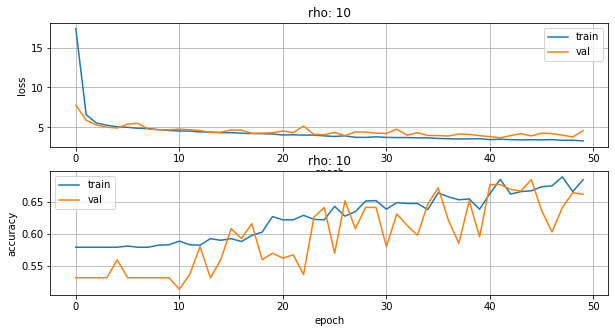

492/492 [==============================] - 0s 75us/step
loss: [4.030614693959554, 0.6768292784690857]
Train on 1605 samples, validate on 402 samples
Epoch 1/50
1605/1605 [==============================] - 1s 743us/step - loss: 18.0363 - accuracy: 0.5850 - val_loss: 10.3158 - val_accuracy: 0.6269
Epoch 2/50
1605/1605 [==============================] - 0s 87us/step - loss: 6.6422 - accuracy: 0.5875 - val_loss: 7.5611 - val_accuracy: 0.6269
Epoch 3/50
1605/1605 [==============================] - 0s 86us/step - loss: 6.0899 - accuracy: 0.5875 - val_loss: 6.7390 - val_accuracy: 0.6269
Epoch 4/50
1605/1605 [==============================] - 0s 118us/step - loss: 5.8753 - accuracy: 0.5832 - val_loss: 6.8186 - val_accuracy: 0.6269
Epoch 5/50
1605/1605 [==============================] - 0s 146us/step - loss: 5.8377 - accuracy: 0.5875 - val_loss: 6.3514 - val_accuracy: 0.6269
Epoch 6/50
1605/1605 [==============================] - 0s 80us/step - loss: 5.7372 - accuracy: 0.5875 - val_loss: 8.3343

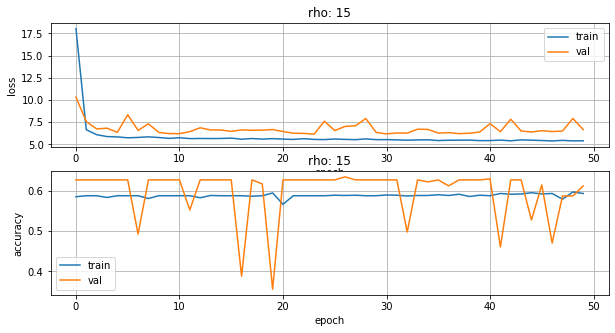

502/502 [==============================] - 0s 66us/step
loss: [6.686516051273422, 0.5836653113365173]
Train on 1585 samples, validate on 397 samples
Epoch 1/50
1585/1585 [==============================] - 2s 1ms/step - loss: 16.6371 - accuracy: 0.5691 - val_loss: 7.1130 - val_accuracy: 0.5592
Epoch 2/50
1585/1585 [==============================] - 0s 102us/step - loss: 6.3085 - accuracy: 0.5962 - val_loss: 6.0865 - val_accuracy: 0.5592
Epoch 3/50
1585/1585 [==============================] - 0s 127us/step - loss: 6.0913 - accuracy: 0.5962 - val_loss: 6.1170 - val_accuracy: 0.5592
Epoch 4/50
1585/1585 [==============================] - 0s 110us/step - loss: 5.9131 - accuracy: 0.5962 - val_loss: 5.8903 - val_accuracy: 0.5592
Epoch 5/50
1585/1585 [==============================] - 0s 77us/step - loss: 5.8982 - accuracy: 0.5962 - val_loss: 5.9731 - val_accuracy: 0.5592
Epoch 6/50
1585/1585 [==============================] - 0s 91us/step - loss: 5.8762 - accuracy: 0.5962 - val_loss: 6.0261 -

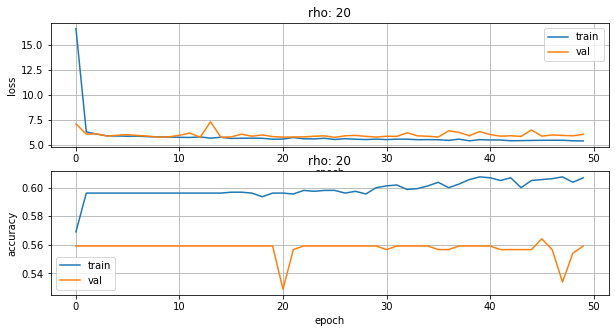

496/496 [==============================] - 0s 70us/step
loss: [7.672362696739935, 0.5625]
Train on 1636 samples, validate on 409 samples
Epoch 1/50
1636/1636 [==============================] - 1s 763us/step - loss: 17.0615 - accuracy: 0.5183 - val_loss: 6.6851 - val_accuracy: 0.5892
Epoch 2/50
1636/1636 [==============================] - 0s 106us/step - loss: 6.4244 - accuracy: 0.5874 - val_loss: 6.1916 - val_accuracy: 0.5892
Epoch 3/50
1636/1636 [==============================] - 0s 211us/step - loss: 5.9658 - accuracy: 0.5868 - val_loss: 6.2800 - val_accuracy: 0.5892
Epoch 4/50
1636/1636 [==============================] - 0s 190us/step - loss: 5.8923 - accuracy: 0.5868 - val_loss: 5.9961 - val_accuracy: 0.5672
Epoch 5/50
1636/1636 [==============================] - 0s 99us/step - loss: 5.9777 - accuracy: 0.5868 - val_loss: 5.7138 - val_accuracy: 0.5892
Epoch 6/50
1636/1636 [==============================] - 0s 80us/step - loss: 5.8534 - accuracy: 0.5868 - val_loss: 5.7931 - val_accur

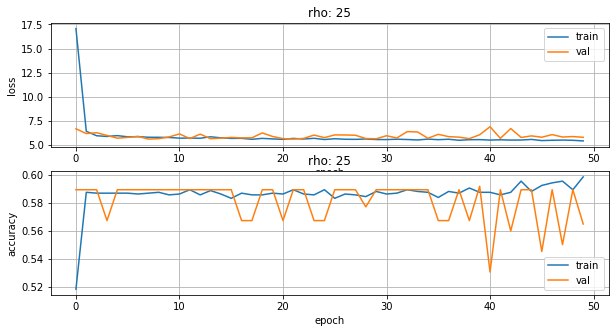

512/512 [==============================] - 0s 65us/step
loss: [5.673506826162338, 0.595703125]


In [18]:
models = list()

for i, rho in enumerate(rhos):
    # 1. 데이터 준비
    X_train = X_trains[i]
    X_val = X_vals[i]
    X_test = X_tests[i]
    
    Y_train = Y_trains[i]
    Y_val = Y_vals[i]
    Y_test = Y_tests[i]
    
    # 2.모델 구성하기
    model = Sequential()
    model.add(Dense(64, input_dim=len(col_input), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(4))
    
    # 3.모델 학습과정 설정하기
    model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
    
    # 4.모델 학습시키기
    hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50, batch_size=64)
    
    # 5.학습과정 살펴보기
    plt.figure(figsize=(10, 5))

    # loss
    plt.subplot(2,1,1)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.grid()
    plt.title('rho: '+str(rho))
    #plt.show()

    # accuracy
    plt.subplot(2,1,2)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.grid()
    plt.title('rho: '+str(rho))
    plt.show()
    
    # 6.모델 평가하기
    loss = model.evaluate(X_test, Y_test, batch_size=32)
    print('loss: '+str(loss))
    
    models.append(model)

In [19]:
# 제출용
#x_test_submit = df_test[col_input].fillna(0.1)
#y_test_submit = df_test[col_output]

for i, model in models:
    loss = model.predict(X_submissions[i])
    print('rho: '+str(rhos[i])+', loss: '+str(loss))

TypeError: 'Sequential' object is not iterable

In [ ]:
df_sub = pd.DataFrame(loss, columns=['hhb', 'hbo2', 'ca', 'na'])
df_submission = pd.concat([df_test['id'], df_sub], axis=1)

display(df_submission)

path = PATH_OUTPUT_TABLE+'submission.csv'
df_submission.to_csv(path, index=False)

### 해야할 일 
- 결측치 보정
- rho 값에 따라 모델 생성
- rho 값에 따라 스케일
- 스케일할 때 validation set 과 구분